<a href="https://colab.research.google.com/github/SaraPMC/fiap-deep-learning/blob/main/TrabalhoFinal/Exercicio4/TrabalhoFinal_RedesNeuraisConvolucionais_Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Redes Neurais Convolucionais**

**Exercício #4**

Utilizando o dataset Fashion MNIST, construa uma CNN para a classificação do dataset.

Dicas:

• Utilize a LetNet-5 como exemplo bem como o exemplo visto em sala de aula do dataset minst.

• Utilize o comando (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() para carregar o dataset.

• Os labels da classe são os seguintes:

0 T-shirt/top | 1 Trouser | 2 Pullover | 3 Dress | 4 Coat | 5 Sandal      | 6 Shirt   | 7 Sneaker  | 8 Bag   | 9 Ankle boot

In [ ]:
#Importando as bibliotecas
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#from keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [ ]:
#Carrega os dados do dataset Minst
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
labels = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'  ]

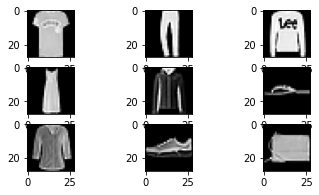

In [ ]:
classes = set(y_test)

plt.figure(0)
for c in classes:  
  idx =  np.where(y_test == c) 
  if c + 1 == 10:
    break  
  plt.subplot(430 + 1 + c)
  # plot raw pixel data
  plt.imshow(X_test[idx[0][0]], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)


# Normaliza as entradas de 0-255 para 0-1
X_train = X_train / 255
X_test = X_test / 255

#converter a matriz de 
#amostra,dimensão e canal = tensor

(28, 28, 1)


In [ ]:
# Gera os vetores com as classes do conjunto de dados de treinamento e teste
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#converter vetor y em variaveis binárias (to.category)
num_classes = y_test.shape[1]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Cria o modelo
model = Sequential()

#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros)
#32 imagens de tamanho de 5/5 
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))#
print( model.output_shape)

#Camada de Pooling 	  
#pegar pixel max  
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
#64 filtros com tamanho de 5/5
model.add(Conv2D(64, (5, 5), activation='relu'))
print( model.output_shape)

#Camada de Pooling 	
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Remove 20% das ativações de entrada aleatoriamente 
#para prevenir overfitting
model.add(Dropout(0.2))

#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(32, activation='relu'))
print( model.output_shape)
model.add(Dense(16, activation='relu'))
print( model.output_shape)

#Função de Ativação Softmax (segmmoid probabilistica)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)

(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 1024)
(None, 32)
(None, 16)
(None, 10)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=20, batch_size=500)

Epoch 1/20
96/96 [==============================] - 3s 28ms/step - loss: 0.5280 - accuracy: 0.8054 - val_loss: 0.5047 - val_accuracy: 0.8117
Epoch 2/20
96/96 [==============================] - 3s 27ms/step - loss: 0.5198 - accuracy: 0.8087 - val_loss: 0.4935 - val_accuracy: 0.8192
Epoch 3/20
96/96 [==============================] - 2s 26ms/step - loss: 0.5113 - accuracy: 0.8118 - val_loss: 0.4794 - val_accuracy: 0.8246
Epoch 4/20
96/96 [==============================] - 2s 26ms/step - loss: 0.5032 - accuracy: 0.8144 - val_loss: 0.4727 - val_accuracy: 0.8260
Epoch 5/20
96/96 [==============================] - 3s 27ms/step - loss: 0.4952 - accuracy: 0.8189 - val_loss: 0.4663 - val_accuracy: 0.8296
Epoch 6/20
96/96 [==============================] - 3s 27ms/step - loss: 0.4887 - accuracy: 0.8224 - val_loss: 0.4665 - val_accuracy: 0.8296
Epoch 7/20
96/96 [==============================] - 3s 27ms/step - loss: 0.4810 - accuracy: 0.8238 - val_loss: 0.4556 - val_accuracy: 0.8336
Epoch 8/20
96

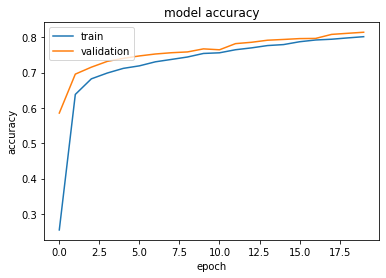

In [ ]:
#Plota o grafico com a acuracia
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Erro e Acuracia
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 19.20%
Acurária da CNN: 80.80%


In [ ]:
scores

[0.525545060634613, 0.8080000281333923]

In [ ]:
model.save('MNIST.hdf5')

In [ ]:
model_loaded  = load_model('MNIST.hdf5')